## 1. BUSINESS UNDERSTANDING
My Datasetcontains INformation AirBnB listings in Seattle, calendar availability for each of these listings as well as user reviews on the listings. Using this dataset, I am going to attempt to answer the following business questions.

Pricing Trends
1. How does pricing increase or decrease by season and what is the peak season in Seattle?
2. How does pricing increase or decrease by neighborhood and which ones are the priciest neighborhoods in Seattle?
3. How does property types within neighborhoods impact price for the most expensive neighborhoods and most common property types?

Sentiment Analysis of Reviews
1. How can we categorize reviews based on sentiments?
2. Can we map positive and negative sentiments from reviews to neighborhoods to understand which neighborhoonds rank higher on the positive sentiment scale and which ones rank higher on the negative sentiment scale?
3. Can we explore some of the worst reviews for additional insights?

Price Prediction
Can we predict price for a given listing? What factors of the listing correlate best for predicting price?

Pricing trend related questions can help understand peak seasons and neighborhood in Seattle and can allow AirBnB to regulate inventory accordingly. It can also help with targeting more effective marketing campaigns.

Sentiment analysis of reviews can give AirBnB insight into brand affinity and gauge consumer interest. In addition, associating the sentiments with neighborhoods can detect problematic neighborhoods.

Price prediction can help understand what factors mostly correlate with price. This is helpful so these features can be top of mind for AirBnB as well as AirBnB hosts.

## 2. DATA UNDERSTANDING
Let's look at the data
As a first step, I will be reading the 3 files part of the Seattle AirBnB dataset and exploring each of the datasets a bit.

In [2]:
# Import statements
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Read in the calendar data set
df_calendar = pd.read_csv('C:/Users/Ahsan Khan/Desktop/Data Science Project 1/calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# Read in the listings data set
df_listings = pd.read_csv('C:/Users/Ahsan Khan/Desktop/Data Science Project 1/listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
# Read in the reviews data set
df_reviews = pd.read_csv('C:/Users/Ahsan Khan/Desktop/Data Science Project 1/reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Exploring the Calendar DataSet

In [8]:
# Print rows and columns in calendar data set
print("Number of rows and columns: ", df_calendar.shape)
# Assess null values
print(df_calendar.isnull().sum())
# Describe
print(df_calendar.describe(include='all'))

Number of rows and columns:  (1393570, 4)
listing_id         0
date               0
available          0
price         459028
dtype: int64
          listing_id        date available    price
count   1.393570e+06     1393570   1393570   934542
unique           NaN         365         2      669
top              NaN  2016-07-07         t  $150.00
freq             NaN        3818    934542    36646
mean    5.550111e+06         NaN       NaN      NaN
std     2.962274e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     3.258213e+06         NaN       NaN      NaN
50%     6.118244e+06         NaN       NaN      NaN
75%     8.035212e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


This Dataset has a few null values in the price column.

# Exploring the Listings DataSet

In [9]:
# Print rows and columns in calendar data set
print("Number of rows and columns: ", df_listings.shape)
# Assess null values
print(df_listings.isnull().sum())

Number of rows and columns:  (3818, 92)
id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64


In [10]:
# Describe
print(df_listings.describe(include='all'))

                  id                           listing_url     scrape_id  \
count   3.818000e+03                                  3818  3.818000e+03   
unique           NaN                                  3818           NaN   
top              NaN  https://www.airbnb.com/rooms/7561254           NaN   
freq             NaN                                     1           NaN   
mean    5.550111e+06                                   NaN  2.016010e+13   
std     2.962660e+06                                   NaN  0.000000e+00   
min     3.335000e+03                                   NaN  2.016010e+13   
25%     3.258256e+06                                   NaN  2.016010e+13   
50%     6.118244e+06                                   NaN  2.016010e+13   
75%     8.035127e+06                                   NaN  2.016010e+13   
max     1.034016e+07                                   NaN  2.016010e+13   

       last_scraped                    name  \
count          3818                    3

In [9]:
# Explore Categorical Feature - experiences_offered
print('Value counts for experiences_offered: ', df_listings['experiences_offered'].value_counts())

Value counts for experiences_offered:  none    3818
Name: experiences_offered, dtype: int64


In [11]:
# Explore Categorical Feature - host_location
print('Value counts for host_location: ', df_listings['host_location'].value_counts())

Value counts for host_location:  Seattle, Washington, United States                    3259
US                                                     246
Spokane, Washington, United States                      41
Kent, Washington, United States                         34
Los Angeles, California, United States                  13
                                                      ... 
Long Beach, California, United States                    1
Camano Island                                            1
We live in the house upstairs from the rental flat       1
Rome, Lazio, Italy                                       1
Next door to cottage                                     1
Name: host_location, Length: 120, dtype: int64


# Things to look at:
The experiences offered are None for all rows. The host_location column can use some standardization. For example: "Seattle, Washington, United States", "Seattle" and "Seattle, Washington" should be considered as the same.

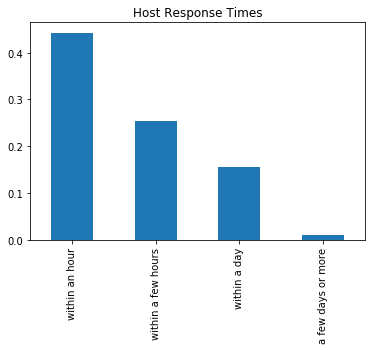

In [12]:
# Explore Categorical Feature - host_response_time
host_response_vals = df_listings['host_response_time'].value_counts()
(host_response_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Host Response Times");


It looks like a good percentage of hosts respond within an hour.

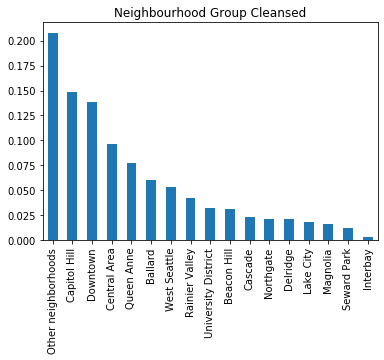

In [13]:
# Explore Categorical Feature - neighborhood_group_cleansed
neigh_vals = df_listings['neighbourhood_group_cleansed'].value_counts()
(neigh_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Group Cleansed");

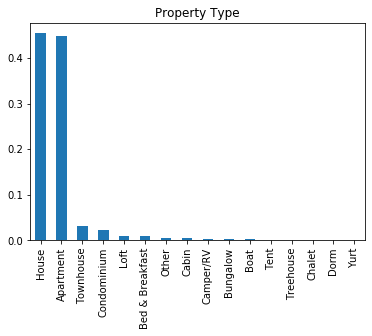

In [14]:
# Explore Categorical Feature - property_type
prop_vals = df_listings['property_type'].value_counts()
(prop_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Property Type");

It looks like apartments and houses dominate the listings data set. We can focus on these if needed.

## Exploring the Reviews DataSet

In [15]:
# Print rows and columns in reviews data set
print("Number of rows and columns: ", df_reviews.shape)
# Assess null values
print(df_reviews.isnull().sum())
# Describe
print(df_reviews.describe(include='all'))

Number of rows and columns:  (84849, 6)
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64
          listing_id            id        date   reviewer_id reviewer_name  \
count   8.484900e+04  8.484900e+04       84849  8.484900e+04         84849   
unique           NaN           NaN        1930           NaN         14380   
top              NaN           NaN  2015-09-21           NaN         David   
freq             NaN           NaN         580           NaN           870   
mean    3.005067e+06  3.058765e+07         NaN  1.701301e+07           NaN   
std     2.472877e+06  1.636613e+07         NaN  1.353704e+07           NaN   
min     4.291000e+03  3.721000e+03         NaN  1.500000e+01           NaN   
25%     7.946330e+05  1.725127e+07         NaN  5.053141e+06           NaN   
50%     2.488228e+06  3.228809e+07         NaN  1.413476e+07           NaN   
75%     4.694479e+06  4.457648e+07         NaN 

# Data Prep

### Question 1 - PRICE ANALYSIS
##### a. Understand price increases/decreases by season and detect peak season 
##### b. Understand price increases/decreases by neighborhood and detect pricey neighborhoods 
##### c. Understand how property types within neighborhoods impact price for some neighborhoods and property types

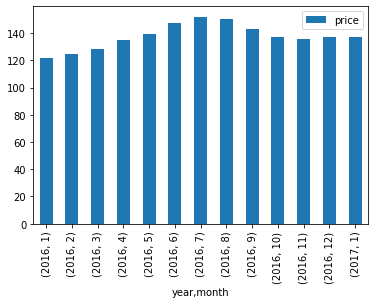

In [16]:
# Plot the average price by month 
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month

# In order to average price, we will be converting it to float and removing the $ sign
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

df_calendar.groupby(['year','month'])[['price']].mean().plot(kind="bar");

#### Analysis
Based on the above chart, it shows that June through August are the peak months, with July being the highest. 

The year starts out slow, with January having the lowest average price. Prices start to pick back up a little around Apr/May and Nov/Dec respectively.

                             price
neighbourhood_cleansed            
Southeast Magnolia      231.705882
Portage Bay             227.857143
Westlake                194.470588
West Queen Anne         187.769231
Montlake                182.789474
...                            ...
North Delridge           76.375000
Georgetown               76.125000
South Delridge           74.666667
Olympic Hills            71.687500
Rainier Beach            68.555556

[87 rows x 1 columns]


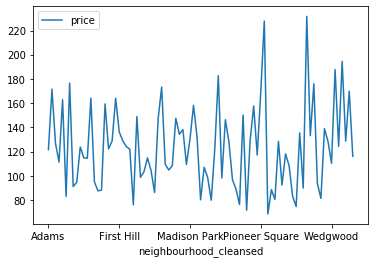

In [17]:
# Plot the average price by neighborhood

# In order to average price, we will be converting it to float and removing the $ sign
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

print(df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().plot();


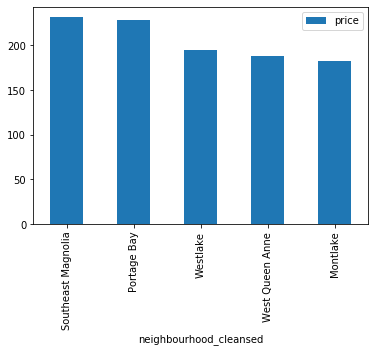

In [18]:
# Plot top 10 neighborhoods
top10_neigh = df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head()
top10_neigh.plot(kind='bar');

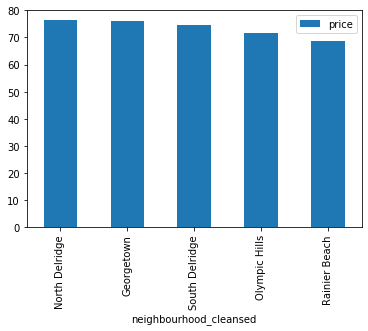

In [19]:
# Plot bottom 10 neighborhoods
bottom10_neigh = df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).tail()
bottom10_neigh.plot(kind='bar');

#### Analysis
Based on above findings, there is definitely price fluctuations based on neighborhoods. 


In [20]:
# Explore property types within neighborhoods and how they impact price
# Focus on the top 5 expensive Neighborhoods from above - Southeast Magnolia, Portage Bay, Westlake, West Queen Anne and Montlake
# Focus on property types - House and Apartment

values_keep_neigh = ('Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake')
values_keep_prop = ('Apartment','House')
df_listings_pruned1 = df_listings.loc[df_listings['neighbourhood_cleansed'].isin(values_keep_neigh)]
df_listings_pruned2 = df_listings_pruned1.loc[df_listings['property_type'].isin(values_keep_prop)]

df_neigh_prop = df_listings_pruned2.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
df_neigh_prop

,neighbourhood_cleansed,property_type,price
0,Montlake,Apartment,133.333333
1,Montlake,House,191.533333
2,Portage Bay,Apartment,113.833333
3,Portage Bay,House,340.285714
4,Southeast Magnolia,Apartment,219.600000
5,Southeast Magnolia,House,234.100000
6,West Queen Anne,Apartment,128.208333
7,West Queen Anne,House,247.393939
8,Westlake,Apartment,142.400000
9,Westlake,House,168.000000


In [21]:
price_arr = df_neigh_prop['price'].values
price_arr = np.reshape(price_arr, (5,2))
price_arr.shape

(5, 2)

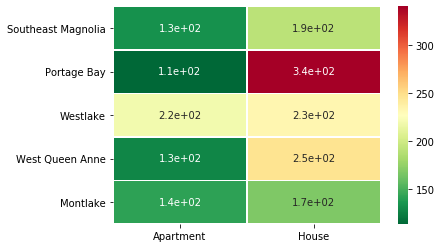

In [22]:

# Heatmap reference: https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
idx = ['Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake']
cols = ['Apartment', 'House']
df = pd.DataFrame(price_arr, index=idx, columns=cols)

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True);

#### Analysis
We focused on the top 5 expensive neighbourhoods from above finds as well as Houses and Apartments mostly since based on the previous analysis, we know they make up a good percentage of property types.

Based on the above, we can see that Houses in Portage Bay are the most expensive followed by Houses in West Queen Anne and Westlake. It is interesting to note that in Westlake, both Houses and Apartments can be found at approx. the same price.

#### Question 2 - ANALYSIS OF REVIEWS
##### a. Understand positive and negative sentiments from review comments
##### b. Map the positive and negative sentiments to neighborhoods to understand which neighborhoonds rank higher on the positive sentiment scale and which ones rank higher on the negative sentiment scale
##### c. Explore some of the worst reviews

In [23]:
# Create a smaller data frame with just listing ids and review comments
df_comments = df_reviews[['listing_id', 'comments']].copy()
df_comments.head()

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...


In [24]:
# Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
# Initially, I tried with the neighbourhood field in the listings dataset, but found that some values were blank, so I used neighbourhood_cleansed field
def get_neighborhood(listing_id):
    '''
    Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
    INPUT:
    listing_id - listing_id field for a particular listing
    OUTPUT:
    neighbourhood - the neighbourhood_cleansed field associated with a particular listing_id
    
    Helps to map each listing_id to it's respective neighbourhood in order to associate reviews with neighbourhoods
    '''
    neighbourhood = df_listings.loc[df_listings['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood

# Test function
get_neighborhood(7202016)

'Lower Queen Anne'

In [25]:
# Apply get_neighborhood function to the listing ids
df_comments['neighbourhood'] = df_comments['listing_id'].apply(get_neighborhood)
df_comments.head()

,listing_id,comments,neighbourhood
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne


In [26]:
# Check to see if any listing ids don't have neighborhoods associated
df_comments['neighbourhood'].isnull().sum()

0

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
# SentimentIntensityAnalyzer reference: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    '''
    Function to run sentiment intensity analyzer on a sentence and return compound polarity score
    INPUT:
    sentence - the text of the review comments 
    OUTPUT:
    score['compound'] - the compound score combining the positive, negative and neutral scores
    
    Provides the compound score for a particular sentence for sentiment analysis
    '''
    sentence = str(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']


df_comments['polarity_score'] = df_comments['comments'].apply(sentiment_analyzer_scores)
df_comments.head()

,listing_id,comments,neighbourhood,polarity_score
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9875
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.8718
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.8313
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.9783


In [29]:
# Print number of positive, negative and neutral compound polarity scores
print('Positive compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] > 0].count())
print('Negative compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] < 0].count())
print('Neutral compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] == 0].count())

Positive compound scores:  82554
Negative compound scores:  743
Neutral compound scores:  1552


In [30]:
# Group by neighbourhood and average the polarity scores
neigh_polarity = df_comments.groupby('neighbourhood')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False)

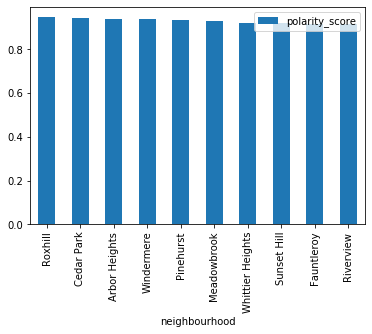

In [31]:
# Visualize top neighborhoods based on reviews
neigh_polarity.head(10).plot(kind='bar');

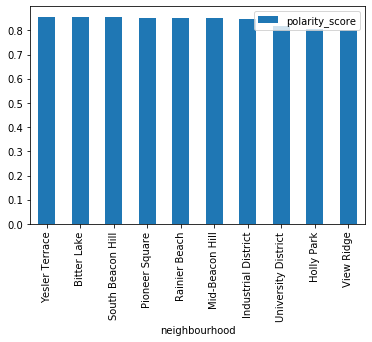

In [32]:
# Visualize bottom 10 neighborhoods based on reviews
neigh_polarity.tail(10).plot(kind='bar');

#### Analysis
Roxhill, Cedar Park and Pinehurst are some of the neighborhoods that have top reviews. Relatively, the lower ranking neighborhoods are University District, Holly Park and View Ridge

In [33]:
# Explore the worst reviews
df_comments.sort_values(by='polarity_score',ascending=False).tail(10)

,listing_id,comments,neighbourhood,polarity_score
14908,685600,Das Zimmer war wie beschrieben und die Umgebun...,Lawton Park,-0.9885
1786,208356,Die Unterkunft ist so wie beschrieben und die ...,International District,-0.9892
36603,189156,Although this unit was in a very nice part of ...,Seaview,-0.9904
68659,9519968,Do NOT rent this house if you are not the clea...,Montlake,-0.9906
18347,26116,Für den Aufenthalt in einer fremdem Stadt hatt...,Broadway,-0.9927
75564,1775016,Staying at Robert’s place was a nightmare. At ...,Broadway,-0.9941
32404,3291777,Melissa replied to our request and approved bu...,University District,-0.9956
84378,4577542,"Die Unterkunft war sehr schön und genau so, wi...",Minor,-0.9961
29434,1018204,"leider war esnicht so fein, da die unterkunft ...",Minor,-0.9967
50261,258571,Wir sind 5 Nächte geblieben. Und es ist eine A...,Broadway,-0.9973


#### Analysis
We can see most of the reviews that were rated badly on the polarity score seem to be in a different language other than English! Perhaps this is a limitation of the Sentiment Intensity Analyzer.

The other 3 reviews seem to be genuinely bad, with users complaining about the lack of A/C and fans, host being rude, construction noise ruining people's stay, poor condition of the place etc.

### Question 3 - PRICE PREDICTION
1. Predict price for a given listing.
2. What factors correlate well to predicting price?

In [34]:
# Check if price has missing values, if it does, we want to remove those records from the dataset
df_listings['price'].isnull().sum()

0

#### Analysis
All records in the listings dataset have price information available to use.

Based on the field definitions, there are some columns that seem less likely to impact price, so we will drop these from the dataset in order to work with a cleaner and smaller dataset. The reasons for dropping these fields are mostly:

ID field or meta data associated with the listing

Other fields that capture same/similar information (eg: using country code and dropping country)

Dropping very granular fields such as street, zipcode, latitude, longitude etc. and keeping the analysis at the city level

The columns we will be dropping are: id,listing_url,scrape_id,last_scraped,thumbnail_url,medium_url,xl_picture_url,host_id, host_url,host_thumbnail_url,host_verifications,street,neighbourhood,neighbourhood_group_cleansed,zipcode,smart_location,country,latitude,longitude,weekly_price,monthly_price,calendar_updated,calendar_last_scraped,first_review,last_review, calculated_host_listings_count,reviews_per_month

In [35]:
df_listings.shape

(3818, 92)

In [36]:
# Drop columns that are less likely to have an impact on price
df_list = df_listings.copy()
cols_less_impact = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','xl_picture_url','host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood','neighbourhood_group_cleansed','zipcode','smart_location','country','latitude','longitude','weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review','last_review','calculated_host_listings_count','reviews_per_month']
df_list = df_list.drop(cols_less_impact, axis=1)
df_list.shape

(3818, 65)

In [37]:
# Find columns with all missing values if any 
df_list.columns[df_list.isnull().all()].tolist()

['license']

In [38]:
# Drop license column
df_list = df_list.drop('license', axis=1)
df_list.shape

(3818, 64)

In [39]:
# Review all the numerical columns and assess missing values

num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656


#### Analysis
bathrooms - There are 16 rows with Nan for bathrooms. Since it's a small percentage of rows, I have decided to set bathrooms to 0 for Nan values

bedrooms - Looking at the dataset, since all the rows with blank bedroom field have beds value of at least 1, I will use 1 for bedrooms where bedrooms is Nan

beds - For the 1 record that have beds as Nan, bed_type is specified as Real Bed, so I will set beds to 1 for this case

square_feet - Since a good percentage of this field is Nan, I am going to drop this column

review_scores columns - Since these are review related scores, I will be setting all Nan values to 0 assuming no review scores for these listings.

host_listings_count and host_total_listings_count - There are only 2 rows with no values. Looking at the data, I determined that these host IDs only have 1 record associated with them each, so I decided to populate with 1.

In [40]:
# Set 0 for bathroom where bathroom is Nan
df_list['bathrooms'] = df_list['bathrooms'].fillna(0)

# Set 1 for bedrooms where bedrooms is Nan
df_list['bedrooms'] = df_list['bedrooms'].fillna(1)

# Set 1 for beds where beds is Nan
df_list['beds'] = df_list['beds'].fillna(1)

# Drop square_feet column
df_list = df_list.drop('square_feet',axis=1)

# Set all review scores columns with 0 for Nan values
cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_fillna_0:
    df_list[col] = df_list[col].fillna(0)

# Set host_listings_count and host_total_listings_count to 1
df_list['host_listings_count'] = df_list['host_listings_count'].fillna(1)
df_list['host_total_listings_count'] = df_list['host_total_listings_count'].fillna(1)

In [41]:
# Check again all the numerical columns
num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 0
host_total_listings_count 0
bathrooms 0
bedrooms 0
beds 0
price 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0


In [42]:
# Review all the categorical columns and assess missing values

cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_list[col].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
picture_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
state 0
market 0
country_code 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


#### Analysis
summary, space, neighborhood_overview, notes, transit - Since these are all text fields describing the property in some way, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like summary and transit towards price prediction.

host_name, host_since, host_location, host_about, host_picture_url, host_neighbourhood - Since these are all fields that are descriptive about the host, I am going to convert these fields into boolean fields as well to indicate if a value exists or not.

host_response_time, host_acceptance_rate - These fields seems to have N/A as a valid value, so I will assign N/A where Nan values exist.

host_response_rate - Looking at the data, since this is a percentage value and the range is quite distributed, I will be converting this to float and setting N/A and blanks to 0.

host_is_superhost, host_has_profile_pic, host_identity_verified - These are boolean fields with t or f values. Assign 1 for t, 0 for f and assign Nans with 0

property_type - Since this is just 1 record, we will just drop this record

security_deposit - We will assume a 0 security deposit for where it is not specified. We will also remove $ signs and convert to float

cleaning_fee - We will assume a 0 cleaning_fee where it is not specified. We will also remove $ signs and convert to float

The following fields do not have missing values, but it is important to cleanse these as well.

name, description, picture_url - Since these are all text fields as well, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like description and picture_url towards price prediction.

experiences_offered - all values in this column is 'None' and it doesn't add any value, so we will be dropping this column

market - all values are 'Seattle' in this column, since we have other descriptors for Seattle, we will be dropping this column

is_location_exact, has_availability, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification - these fields have t/f values, will convert to 1/0.

extra_people - Need to remove $ sign and convert to float

jurisdiction_names - All values are 'WASHINGTON', doesn't add much value, will be dropping this column

city - There are some inconsistencies in this field where we have several values for Seattle, for example: "Seattle", "Seattle " (with a space at the end) and "seattle". We will convert all city names to lower case and trim spaces in order to standardize.

state - There are both "WA" and "wa" values for state. We will be converting all state names to lowercase in order to standardize.

amenities - this field contains a list of values in each row, we will need to figure out how to handle this column

In [43]:
# Function to set all text fields to boolean
def set_bool_text(textdata):
    '''
    Function to set all text fields to boolean
    INPUT:
    textdata - the textdata that needs to be converted into a bool value 
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if no text passed, 1 otherwise to indicate presence of the text field
    
    Converts the text columns into a boolean field representing the presence or absence of the text field
    '''
    if not textdata:
        return 0
    else:
        return 1


text_host_fields = ['summary','space','neighborhood_overview','notes','transit','name','description','picture_url','host_name','host_since','host_location','host_about','host_picture_url','host_neighbourhood']
for t in text_host_fields:
    df_list[t] = df_list[t].apply(set_bool_text)

In [44]:
# Function to set all t/f fields to 1/0
def set_bool_tf(tfdata):
    '''
    Function to set all true/false fields to 1 or 0
    INPUT:
    tfdata - the true or false fields that have 't' and 'f' values that we would like to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if false, 1 for true
    
    Converts a true or false type field into a boolean with 1 and 0s
    '''
    if tfdata == 't':
        return 1
    else: 
        return 0

tf_fields = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for t in tf_fields:
    df_list[t] = df_list[t].apply(set_bool_tf)

In [45]:
# Assign N/A to applicable host fields
df_list['host_response_time'] = df_list['host_response_time'].fillna('N/A')
df_list['host_acceptance_rate'] = df_list['host_acceptance_rate'].fillna('N/A')

df_list['host_response_rate'] = df_list['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
df_list['host_response_rate'] = df_list['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df_list['host_response_rate'] = df_list['host_response_rate'].fillna(0)

# Drop record with empty value for property_type
df_list = df_list.dropna(subset=['property_type'], axis=0)

# Clean security_deposit, cleaning_fee and extra people
df_list['security_deposit'] = df_list['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df_list['cleaning_fee'] = df_list['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df_list['extra_people'] = df_list['extra_people'].replace('[\$,]', '', regex=True).astype(float)
df_list['security_deposit'] = df_list['security_deposit'].fillna(0)
df_list['cleaning_fee'] = df_list['cleaning_fee'].fillna(0)

# Drop columns experiences_offered, market and jurisdiction_name
df_list = df_list.drop(['experiences_offered','market','jurisdiction_names',], axis = 1)

# Clean up city names
df_list['city'] = df_list['city'].str.lower()
df_list['city'] = df_list['city'].str.strip()
df_list['state'] = df_list['state'].str.lower()


In [46]:
# Check if missing values are all taken care of
cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_list[col].isnull().sum())

host_response_time 0
host_acceptance_rate 0
neighbourhood_cleansed 0
city 0
state 0
country_code 0
property_type 0
room_type 0
bed_type 0
amenities 0
cancellation_policy 0


#### HANDLE AMENITIES
In order to handle the amenities column, we will try to understand which are some of the most common amenities that are present within the listings. Once we know which amenities are important, we will create additional columns to represent each amenity as a boolean field.

In [47]:
# Handle amenities - Explore most common amenities
amenities = []
for index, row in df_list.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    mylist = row['amenities'].split(',')
    for l in mylist:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),
 ('Family/Kid Friendly', 1962),
 ('First Aid Kit', 1679),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 885),
 ('Pets live on this property', 882),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 508),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 50),
 ('

#### Analysis
Based on the above, I decided to take those amenities that are present more than 2000 times (about 52% compared to entire dataset), which is below.

('Wireless Internet', 3666), ('Heating', 3626), ('Kitchen', 3422), ('Smoke Detector', 3280), ('Essentials', 3237), ('Dryer', 2996), ('Washer', 2991), ('Internet', 2811), ('Shampoo', 2670), ('TV', 2574), ('Carbon Monoxide Detector', 2485), ('Fire Extinguisher', 2196), ('Free Parking on Premises', 2166),

In [48]:
amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    df_list[c_colname] = df_list['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [49]:
# Drop the original amenities field
df_list = df_list.drop('amenities', axis = 1)

In [50]:
df_list.shape

(3817, 72)

In [51]:
# Review the remaining object columns
df_list.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_acceptance_rate', 'neighbourhood_cleansed',
       'city', 'state', 'country_code', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')

In [52]:
# Get Dummies for categorical fields
cat_fields = df_list.select_dtypes(include=['object']).columns

df_list = pd.get_dummies(df_list, columns=cat_fields)
df_list.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1


In [53]:
df_list.shape

(3817, 191)

In [55]:
# Build out X and y, y to be price column and X to be all the other columns
y = df_list['price']
X = df_list.drop(['price'], axis=1)

### 4. MODELING

In [56]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2671, 190) (2671,)
(1146, 190) (1146,)


In [57]:
# Instantiate linear regression model and fit it to training data set
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.626220030507479.  The rsquared score on the test data was 0.6238377518892293.


### 5. EVALUATION

In [58]:
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
8,host_name,8.132960e+15,8.132960e+15
31,has_availability,7.023049e+15,7.023049e+15
6,transit,-6.931035e+15,6.931035e+15
2,space,-5.359101e+15,5.359101e+15
44,requires_license,4.768541e+15,4.768541e+15
11,host_about,-4.665842e+15,4.665842e+15
5,notes,4.248163e+15,4.248163e+15
14,host_picture_url,-3.573907e+15,3.573907e+15
4,neighborhood_overview,3.127366e+15,3.127366e+15
9,host_since,2.296115e+15,2.296115e+15


#### Analysis
After cleaning up the data set, I was able to get an r2score of 0.62 on both training and test data sets. Based on the above coefficient analysis, the features that have the most impact on price are a combination of host details and descriptive information about the listing such as host_name, has_availability, transit, space, host_about, notes, neighborhood_overview etc.

Of course, needless to say, these results may be impacted based on how the data was standardized and some of the choices made.